# Airline Satisfaction Project

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Load Data

In [2]:
# Load Data
air = pd.read_csv('data/train.csv')

In [3]:
air.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
# Drop Unnamed: 0 column
air = air.drop(columns = 'Unnamed: 0')

In [5]:
air.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Data Cleaning

In [6]:
# Checking data type
air.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [7]:
# Checking for NaN
air.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
# The shape of the dataframe
air.shape

(103904, 24)

In [9]:
air.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
air[air.isna().any(axis=1)]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,...,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,...,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,...,5,1,5,5,5,3,5,0,NaN,satisfied


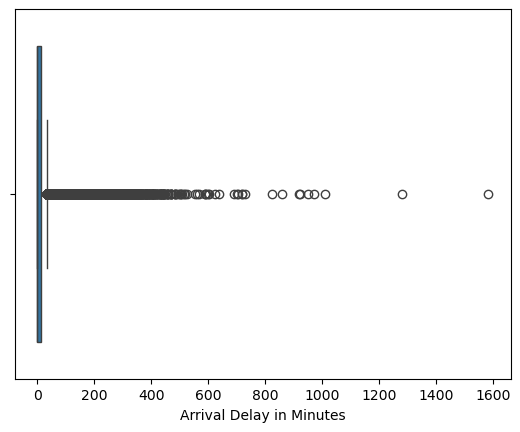

In [11]:
# Check for outliers
sns.boxplot(data = air, 
            x = 'Arrival Delay in Minutes');

> Ther are outliers so we will use the Median(middle) number to replace the NaN's

In [12]:
# Check median
air['Arrival Delay in Minutes'].median()

0.0

> With median being 0, I have decided to drop the rows with NaN's

In [13]:
air.shape

(103904, 24)

In [14]:
# Drop NaN's
air = air.dropna()

In [15]:
air.shape

(103594, 24)

> Now I can change the dtype of the column to int

In [16]:
air['Arrival Delay in Minutes'] = air['Arrival Delay in Minutes'].astype('int64')

In [17]:
air.dtypes

id                                    int64
Gender                               object
Customer Type                        object
Age                                   int64
Type of Travel                       object
Class                                object
Flight Distance                       int64
Inflight wifi service                 int64
Departure/Arrival time convenient     int64
Ease of Online booking                int64
Gate location                         int64
Food and drink                        int64
Online boarding                       int64
Seat comfort                          int64
Inflight entertainment                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Inflight service                      int64
Cleanliness                           int64
Departure Delay in Minutes            int64
Arrival Delay in Minutes        

# Exploratory Data Analysis

In [18]:
air.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0,satisfied


In [19]:
# Lets see what are the top 5 flight distanced traveled  
air['Flight Distance'].value_counts(ascending = False)

Flight Distance
337     659
594     395
404     391
862     368
2475    367
       ... 
76        1
1305      1
877       1
732       1
400       1
Name: count, Length: 3802, dtype: int64

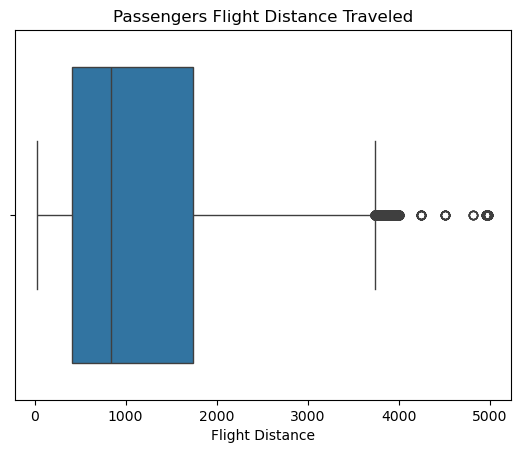

In [20]:
# Lets see what are the top flight distanced traveled 
sns.boxplot(air,
             x = 'Flight Distance')

plt.title('Passengers Flight Distance Traveled');

>This shows that most passengers travel distance is between 500 - 1800.

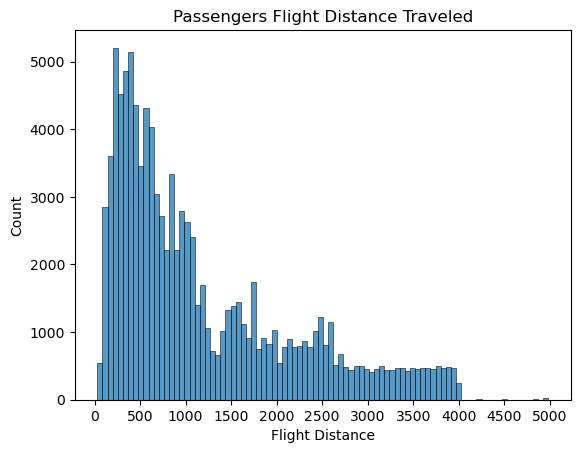

In [21]:
sns.histplot(air,
             x = 'Flight Distance')
plt.xticks(ticks=np.arange(0, 5500, 500))
plt.title('Passengers Flight Distance Traveled');

>This is showing more accuratly that most passengers flight distance is less then 500.

In [22]:
# Let's see the split between genders
air['Gender'].value_counts(normalize = True)

Gender
Female    0.50752
Male      0.49248
Name: proportion, dtype: float64

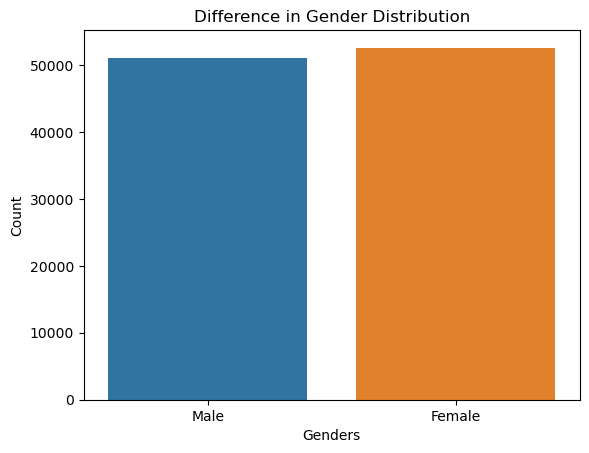

In [23]:
sns.countplot(data = air, 
            x = 'Gender',
              hue = 'Gender')
plt.title('Difference in Gender Distribution')
plt.xlabel('Genders')
plt.ylabel('Count');

> This is showing there are 51% of Female Passengers and  49% of Male Passengers.

In [24]:
air['Customer Type'].value_counts(normalize = True)

Customer Type
Loyal Customer       0.817248
disloyal Customer    0.182752
Name: proportion, dtype: float64

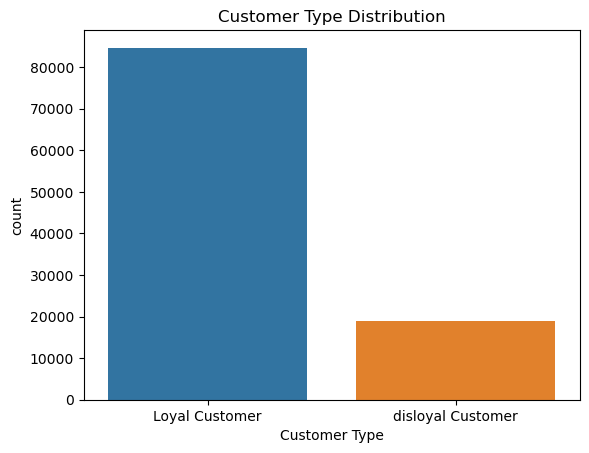

In [25]:
sns.countplot(data = air,
            x = 'Customer Type',
            hue = 'Customer Type')
plt.title('Customer Type Distribution');

Here we can see that 82% of passengers are loyal customers while 18% are disloyal customers. 

In [26]:
air['Type of Travel'].value_counts(normalize = True)

Type of Travel
Business travel    0.689857
Personal Travel    0.310143
Name: proportion, dtype: float64

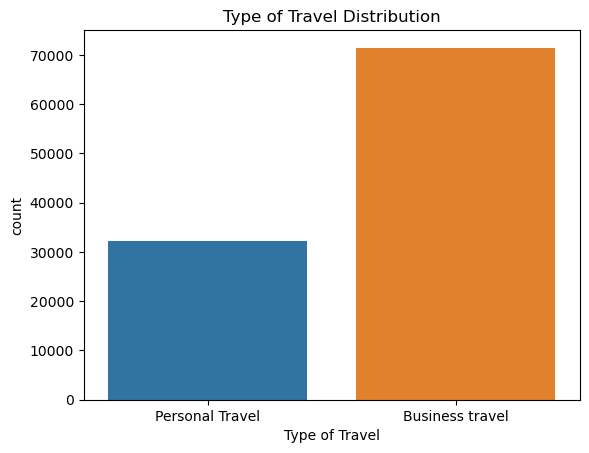

In [27]:
sns.countplot(air, 
             x = 'Type of Travel',
            hue = 'Type of Travel')

plt.title('Type of Travel Distribution');

>This shows that 69% passengers travel for business and 31% of passengers travel for personal.

In [28]:
air['Class'].value_counts(normalize = True)

Class
Business    0.478145
Eco         0.449765
Eco Plus    0.072089
Name: proportion, dtype: float64

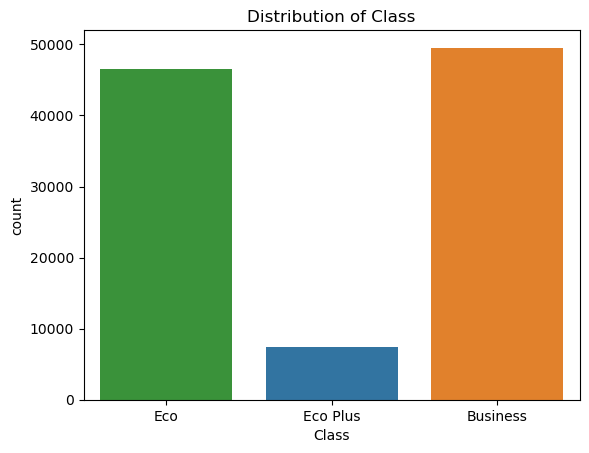

In [29]:
sns.countplot(air, 
             x = 'Class',
            hue = 'Class',
             order = ['Eco', 'Eco Plus', 'Business'])

plt.title('Distribution of Class');

>This shows that 48% of passengers purchased a Business ticket while 45% of passengers purchased a Eco ticket, and the remaing 1% bought a Eco Plus ticket.

In [30]:
air['satisfaction'].value_counts(normalize =True)

satisfaction
neutral or dissatisfied    0.566606
satisfied                  0.433394
Name: proportion, dtype: float64

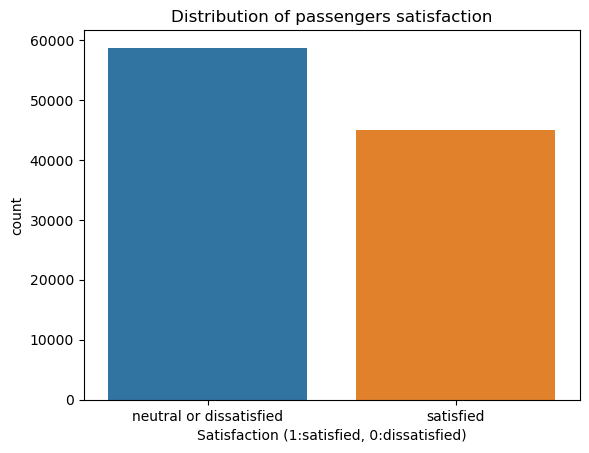

In [31]:
sns.countplot(air,
              x = 'satisfaction',
              hue = 'satisfaction')
plt.title('Distribution of passengers satisfaction')
plt.xlabel('Satisfaction (1:satisfied, 0:dissatisfied)');

>This shows that 57% of plassengers where dissatisified or neutral with thier experience with the airline, while 43% where sastisfied

In [32]:
air.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [33]:
air.describe(include= 'O')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103594,103594,103594,103594,103594
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52576,84662,71465,49533,58697


# Feature Engineering

In [34]:
# Change the column into a numerical with 1 and 0
air['satisfaction'] = air['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})

In [35]:
air['satisfaction'].value_counts()

satisfaction
0    58697
1    44897
Name: count, dtype: int64

In [36]:
# Change the column into a numerical with 1 and 0
air['Type of Travel'] = air['Type of Travel'].map({'Business travel':1, 'Personal Travel':0})

In [37]:
air['Type of Travel'].value_counts()

Type of Travel
1    71465
0    32129
Name: count, dtype: int64

In [38]:
# Change the column into a numerical with 1 and 0
air['Customer Type'] = air['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})

In [39]:
air['Customer Type'].value_counts()

Customer Type
1    84662
0    18932
Name: count, dtype: int64

In [40]:
# Change the column into a numerical with 2, 1, and 0
air['Class'] = air['Class'].map({'Business':2, 'Eco Plus':1, 'Eco':0})

In [41]:
air['Class'].value_counts()

Class
2    49533
0    46593
1     7468
Name: count, dtype: int64

In [42]:
air.describe()

,id,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,...,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,0.817248,39.380466,0.689857,1.028380,1189.325202,2.729753,3.060081,2.756984,2.977026,...,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678,0.433394
std,37460.816597,0.386465,15.113125,0.462554,0.962868,997.297235,1.327866,1.525233,1.398934,1.277723,...,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682,0.495546
min,1.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,1.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64890.000000,1.000000,40.000000,1.000000,1.000000,842.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97370.500000,1.000000,51.000000,1.000000,2.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [43]:
air.describe(include= 'O')

,Gender
count,103594
unique,2
top,Female
freq,52576


# More EDA

In [44]:
# Show only numeric columns
air_heat = air.drop(columns = ['id', 'Gender'])

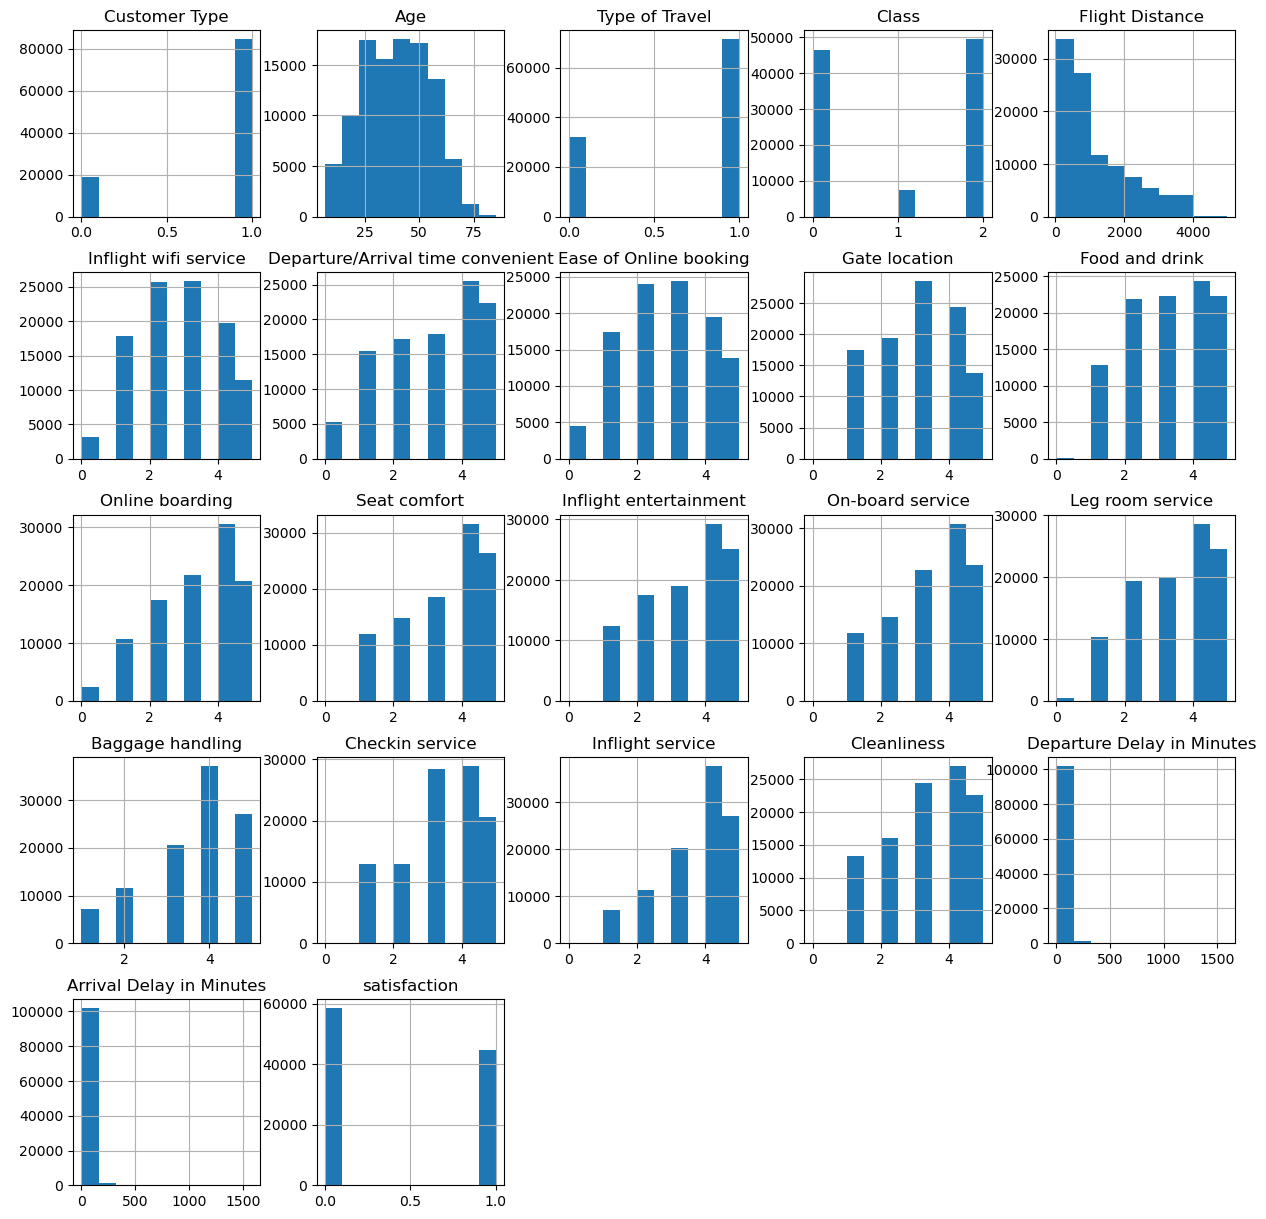

In [45]:
air_heat.hist(figsize = (15, 15));

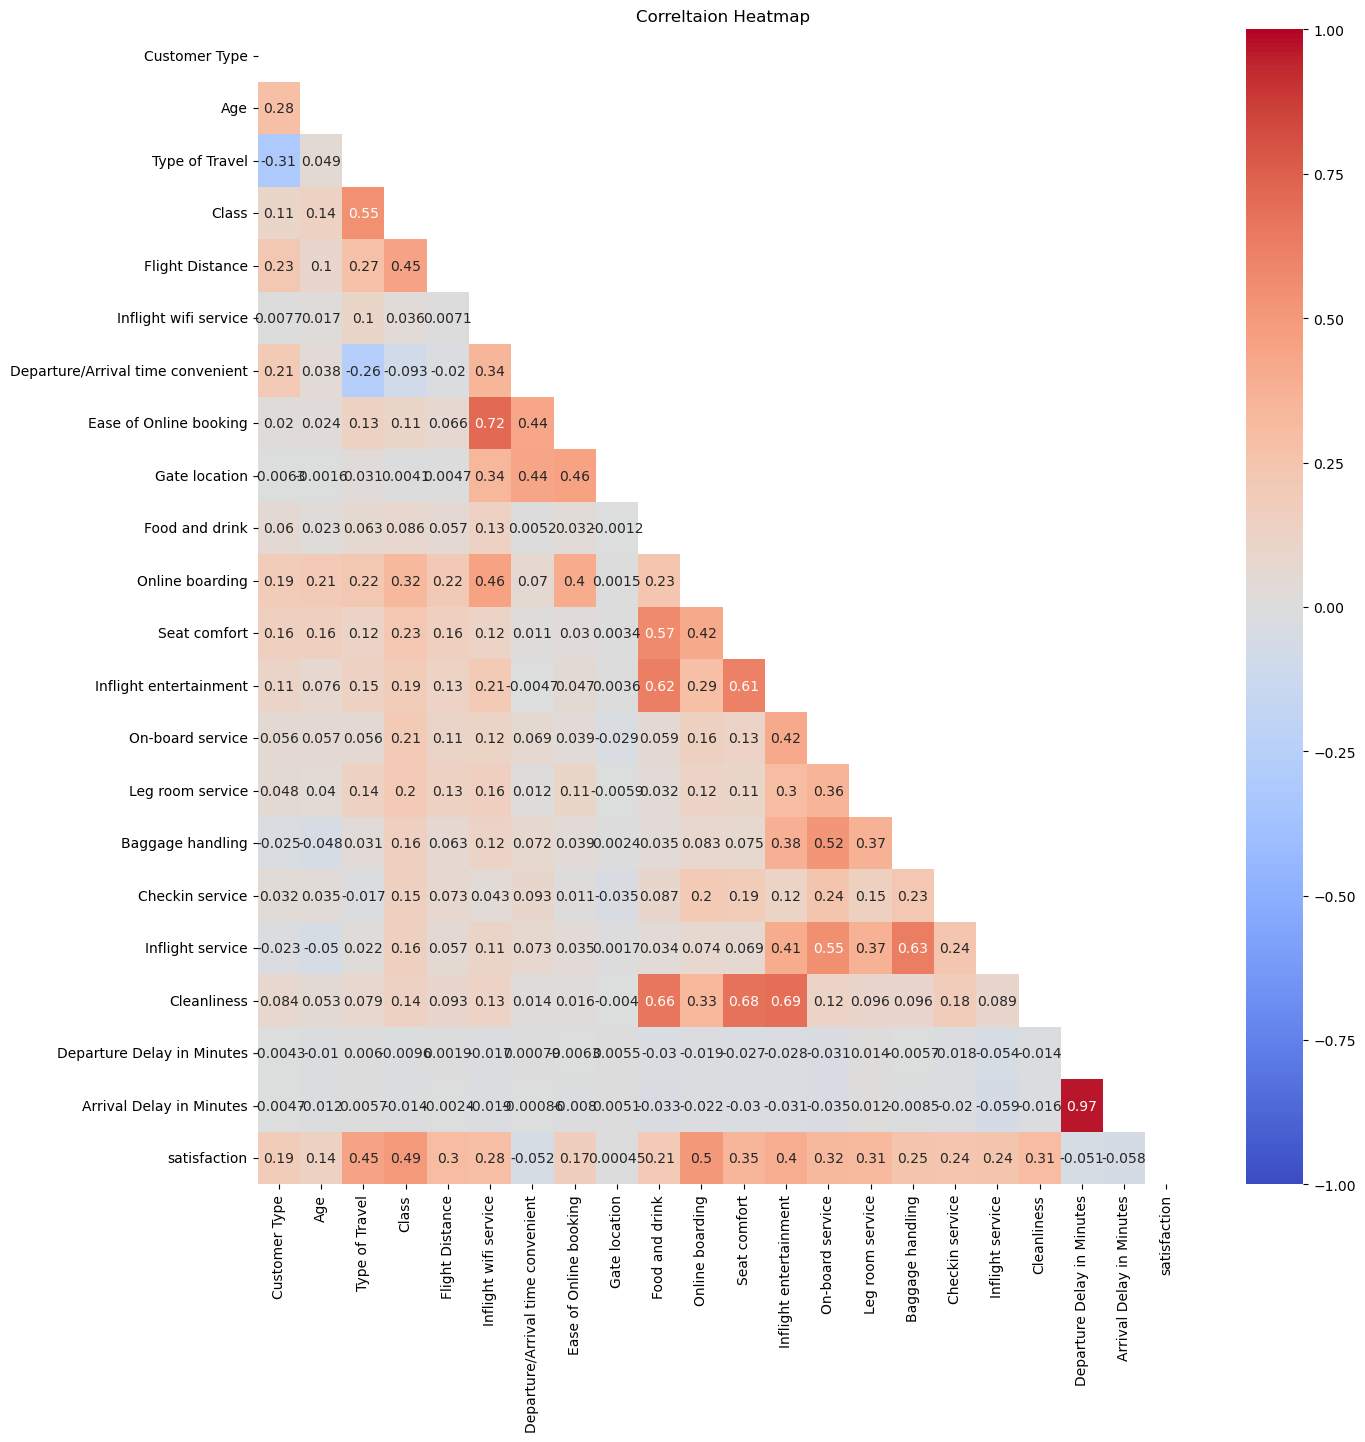

In [46]:
# Make a correlation heatmap
mask = np.triu(np.ones_like(air_heat.corr(), dtype=bool))

plt.figure(figsize=(15, 15))
sns.heatmap(
    air_heat.corr(numeric_only=True),
    mask=mask,  
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="coolwarm"
)

plt.title('Correltaion Heatmap');

>This is showing how each Feature correlates with eachother with a positive or negative corrilation.

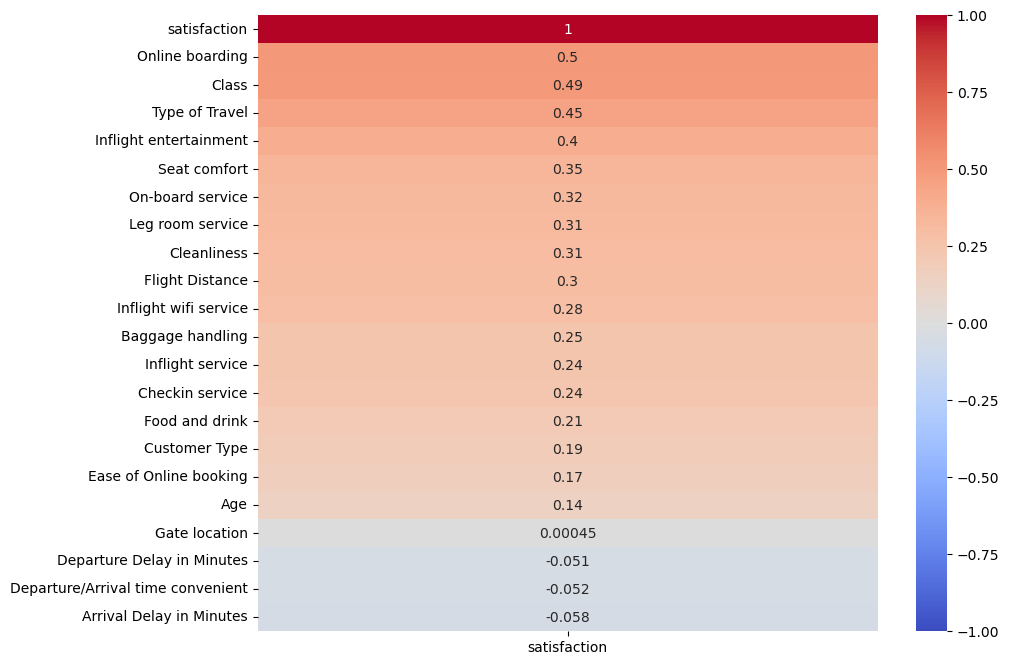

In [47]:
plt.figure(figsize = (10,8))

sns.heatmap(air_heat.corr(numeric_only = True)[['satisfaction']].sort_values(by = 'satisfaction', ascending = False),
            annot = True,
            vmin = -1, 
            vmax = 1,
            cmap = 'coolwarm');

>We can see see how strong of a positive or negative correlations each feature has on the satisfaction. 

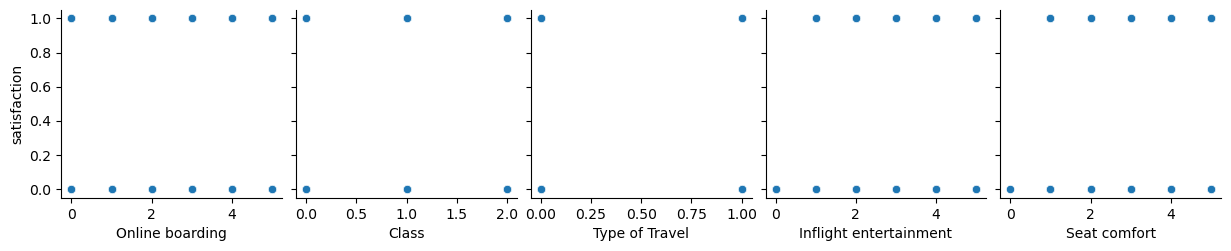

In [48]:
sns.pairplot(data = air,
             x_vars = ['Online boarding', 'Class', 'Type of Travel', 'Inflight entertainment', 'Seat comfort'],
             y_vars = ['satisfaction']);

# Model Preperation

## Basline Model

In [49]:
air['satisfaction'].value_counts(normalize = True)

satisfaction
0    0.566606
1    0.433394
Name: proportion, dtype: float64

## Train Test/Split

In [50]:
# Feature Matrix
X = air.drop(columns = ['satisfaction', 'Gender', 'id'])


# Target Vector
y = air['satisfaction']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

## StandardScaler

In [52]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Instantiate KNN

In [53]:
knn = KNeighborsClassifier()

In [54]:
# Fit
knn.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [55]:
# Training accuracy score
knn.score(X_train_sc, y_train)

0.950395778364116

In [56]:
# Testing accuracy score
knn.score(X_test_sc, y_test)

0.929611181898915

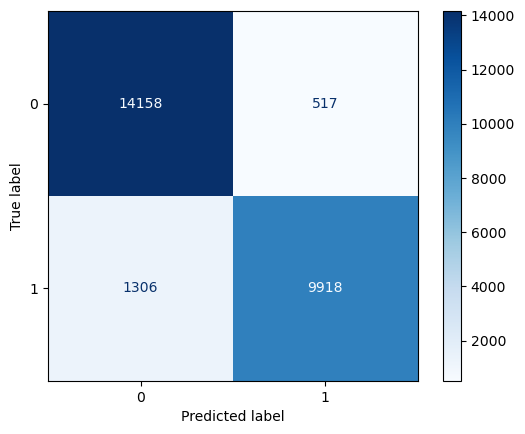

In [57]:
# Confusion Matrix

ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

In [58]:
knn = KNeighborsClassifier()

knn.fit(X_train_sc, y_train)

knn.score(X_test_sc, y_test)

0.929611181898915

In [59]:
# Find best number of neighbors for model
scores = []

for k in range(3, 32, 2):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train_sc, y_train)
    train_score = knn.score(X_train_sc, y_train)
    test_score = knn.score(X_test_sc, y_test)

    scores.append({'k' : k, 'train_score' : train_score, 'test_score' : test_score})
    
df_score = pd.DataFrame(scores)

In [60]:
df_score

,k,train_score,test_score
0,3,0.960319,0.926908
1,5,0.950396,0.929611
2,7,0.945891,0.929766
3,9,0.942969,0.930499
4,11,0.940653,0.930383
5,13,0.938851,0.929650
6,15,0.937821,0.930113
7,17,0.936984,0.929534
8,19,0.935762,0.929920
9,21,0.934835,0.929225


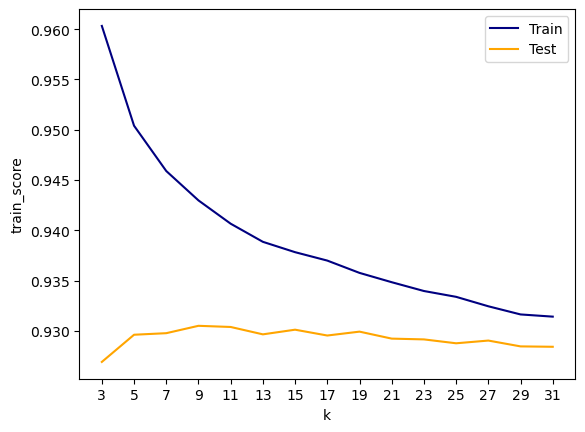

In [61]:
# Visualize this:
sns.lineplot(data = df_score, x = 'k', y = 'train_score', c = 'navy', label = 'Train')
sns.lineplot(data = df_score, x = 'k', y = 'test_score', c = 'orange', label = 'Test')

plt.xticks(range(3, 32, 2));

>We can see that 9 has the best Test Score of the n_neighbors scoring at 0.930499

In [62]:
# Instantiate (again) & Refit (again)
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=9)

In [63]:
# New training score
knn.score(X_train_sc, y_train)

0.9429693030439539

In [64]:
# New testing score
knn.score(X_test_sc, y_test)

0.9304992470751766

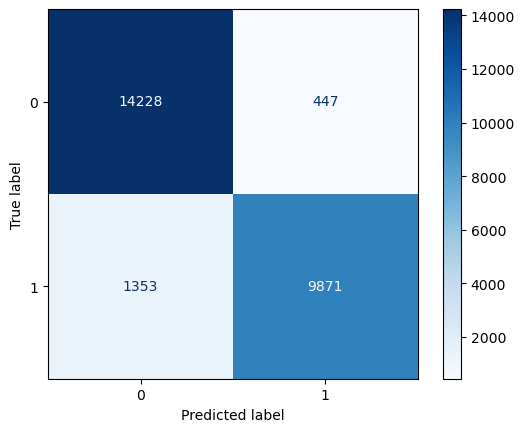

In [65]:
# New Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

>Now we can see the results of having 9 as the n_neighbors, the True Negative has increased in predictioins even though the True Positive has decreased by only 47 incorrect predictions

# Logistic Regression

In [66]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [67]:
logr.score(X_train_sc, y_train)

0.8752429371259411

In [68]:
logr.score(X_test_sc, y_test)

0.8746669755589019

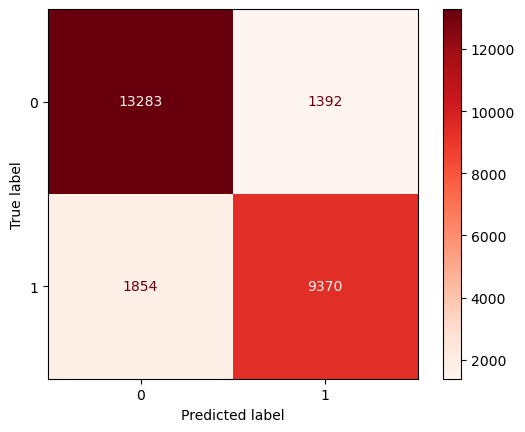

In [69]:
ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Reds');

>We can see that LogisticRegression has a lower score compared to the KNeighborsClassifier

# Random Forest

In [70]:
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [71]:
rf.score(X_train_sc, y_train)

1.0

In [72]:
rf.score(X_test_sc, y_test)

0.9631646009498436

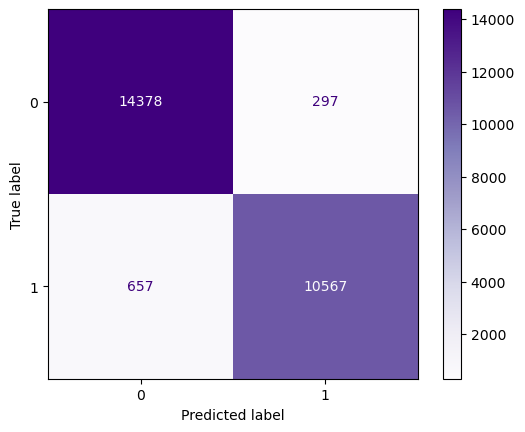

In [73]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');

>We can see here that Random Forest actually out performs KNeighbors giving it a more suitible for predictions. 

In [74]:
air.to_csv('data/new_clean_air.csv')